In [14]:
from typing import Tuple
import numpy as np
import scipy as sp
import scipy.optimize as spo
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Homework 12 - Nonlinear optimization

#### Exercise 1
Consider the differential equations
$$\frac{dx}{dt} = -x+ay+x^2y,\ \frac{dy}{dt}=b-ay-x^2y$$
In mathematics,  a [stationary point][1] of a differentiable function of one variable is a point on the graph of the function where the function's derivative is zero.

Solve for the stationary points of the equations by the relaxation method when $a=1$ and $b=2$;
$$-x+ay+x^2y = 0\ \textrm{  (1) }, \ \ b-ay-x^2y=0\ \textrm{  (2) }$$

So you can check your results, the analytical solution is clearly
$$x=b, \ \ y=\frac{b}{a+b^2}$$

You have two choices of how to solve for $x$ and $y$, depending on which two of the equations you solve for $x$ and the other $y$, or vice vera. Provide both ways as different functions in your program.

[1]: https://en.wikipedia.org/wiki/Stationary_point

<font color="blue">ANSWER:</font>  I put both methods in the same Python cell to try them out. I find that function `f0` does not work, but function `f1` does.  The equations are <br/>
For `f0` $$x=y(a+x^2), \ \ y=\frac{b}{a+x^2}$$
For `f1` $$x=\sqrt{\frac{b-ay}{y}}, \ \ y=\frac{x}{a+x^2}$$

In [15]:
constants = ( 
    1.0, # a
    2.0 # b
)

def f0(x: float, y: float, a: float, b: float) -> float:
    return y * (a + x**2), b / (a + x**2) 

def f1(x: float, y: float, a: float, b: float) -> float:
    return np.sqrt((b - a*y) / y), x / (a + x**2)

In [16]:
test_values = [(1, 1), (0.1, 0.1), (0.5, 0.5), (1, 0.5), (0.5, 1)]

for x, y in test_values:
    # Relaxation Loop Using f0
    for i in range(100):
        xp, yp = f0(x, y, *constants)
        if (np.isclose(x, xp, atol=1.E-6, rtol=0)) and (np.isclose(y, yp, atol=1.E-6, rtol=0)) :
            print("X: {0:9.5f} Y: {1:8.5f}".format(x,y))
            break
        else :
            x = xp
            y = yp

Clearly, f0 does not work

In [17]:
test_values = [(1, 1), (0.1, 0.1), (0.5, 0.5), (1, 0.5), (0.5, 1)]

for x, y in test_values:
    # Relaxation Loop Using f1
    for i in range(100):
        xp, yp = f1(x, y, *constants)
        if (np.isclose(x, xp, atol=1.E-6, rtol=0)) and (np.isclose(y, yp, atol=1.E-6, rtol=0)) :
            print("X: {0:9.5f} Y: {1:8.5f}".format(x,y))
            break
        else :
            x = xp
            y = yp

X:   2.00000 Y:  0.40000
X:   2.00000 Y:  0.40000
X:   2.00000 Y:  0.40000
X:   2.00000 Y:  0.40000
X:   2.00000 Y:  0.40000


#### Excercise 2

Consider this image of two weights hanging from a rigid bar.

<img src="./images/bitmap.png" width=400 >

This is a static picture, nothing is moving. **Can you find the three tensions in the string, $T_1$, $T_2$, and $T_3$?** </font> Looking  at the image on the right, we see we will need to find the angles that all the strings make with respect to the horizontal (the bar is assumed to be horizontal). If we assume that the strings start and end at the same height, the constraints due to geometry alone are the following:

$$
\begin{align*}
L_1\cos\theta_1+L_2\cos\theta_2+L_3\cos\theta_3 &=& L \\
L_1\sin\theta_1+L_2\sin\theta_2-L_3\sin\theta_3 &=& 0 \\
\sin^2\theta_1+\cos^2\theta_1 &=& 1 \\
\sin^2\theta_2+\cos^2\theta_2 &=& 1 \\
\sin^2\theta_3+\cos^2\theta_3 &=& 1
\end{align*}
$$

The last three are trigonometric identities and normally would not need to be there. However, I want to treat $\cos\theta$ and $\sin\theta$ as independant variables to find, so I need more independant equations.
Sum of the forces on each weight should add to zero, and gives these equations;

$$
\begin{align*}
T_1\sin\theta_1-T_2\sin\theta_2-W_1 &=& 0 \\
T_1\cos\theta_1-T_2\cos\theta_2 &=& 0 \\
T_2\sin\theta_2+T_3\sin\theta_3-W_2 &=& 0 \\
T_2\cos\theta_2-T_3\cos\theta_3 &=& 0 
\end{align*}
$$

Now put the unknowns as a vector:

$$
\vec{x} = \left(
\begin{array}{c}
x_0 \\ x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7 \\ x_8
\end{array}
\right)=
\left(
\begin{array}{c}
\sin\theta_1 \\ \sin\theta_2 \\ \sin\theta_3 \\ \cos\theta_1 \\ \cos\theta_2 \\ \cos\theta_3 \\ T_1 \\ T_2 \\ T_3
\end{array}
\right)
$$

Now the nine equations above can be written as vector of nine functions. Just substitute the definition of $x_i$ into the equations, and move any non-zero right side to the left side.
$$
f_i(x_0,\dots,x_8) = 0, \ \ i=0,8
$$
$$
\vec{f}(\vec{x}) = \left(
\begin{array}{c}
f_0(\vec{x}) \\ f_1(\vec{x}) \\ f_2(\vec{x}) \\ f_3(\vec{x}) \\ f_4(\vec{x}) \\ f_5(\vec{x}) \\ f_6(\vec{x}) \\ f_7(\vec{x}) \\ f_8(\vec{x})\end{array}
\right)=0
$$


1. In a new markdown cell, write out the 9 new functions in term of the $x_i$. (Use this cell as a guide to how to enter $\LaTeX{}$
code for arrays of equations.)
2. Compute the Jacobian matrix, and also write it all out in $\LaTeX{}$. Most of the elements are zero. Only 28 are not zero,so only write out those.
3. Use the following values and compute the vector $\vec{x}$ using `scipy.optimize.root`. Use both a Jacobian solver such as `lm` and a non-Jacobian solver such as `krylov`.
```python
constants = (10.0,    # W1
             20.0,    # W2
             3.0,    # L1
             4.0,    # L2
             4.0,    # L3 
             8.0)    # L
```

4. From the results of the `scipy.optimize.root` function: 
    - Print out the number of times the function and Jacobian were used by the solver. This may be either in the variables `res.nfev` \& `res.njev` or in the variable `res.nit`, depending on the solver method.
    - Print out any message returned from the solver.

Here's a helper to get you started:
```python
def f(x,*args) :    
    W1, W2, L1, L2, L3, L = args
    x0,x1,x2,x3,x4,x5,x6,x7,x8 = x

    ...more goes here...
    return numpy.array([f0,f1,f2,f3,f4,f5,f6,f7,f8])
          
def J(x,*args) :
    W1, W2, L1, L2, L3, L = args
    x0,x1,x2,x3,x4,x5,x6,x7,x8 = x
    
    ...more goes here...
    return J
```


<font color="blue">Answer</font>

$$
\begin{align*}

L_1 x_3 + L_2 x_4 + L_3 x_5 - L &=& 0 \\
L_1 x_0 + L_2 x_1 - L_3 x_2 &=& 0 \\
x_0^2 + x_3^2 - 1 &=& 0 \\
x_1^2 + x_4^2 - 1 &=& 0 \\
x_2^2 + x_5^2 - 1 &=& 0 \\
x_6 x_0 - x_7 x_1 - W_1 &=& 0 \\
x_6 x_3 - x_7 x_4 &=& 0 \\
x_7 x_1 + x_8 x_2 - W_2 &=& 0 \\
x_7 x_4 - x_8 x_5 &=& 0

\end{align*}
$$

$$
J_{ij}(x_0, \dots, x_8) =
\begin{pmatrix}
0 & 0 & 0 & L_1 & L_2 & L_3 & 0 & 0 & 0 \\
L_1 & L_2 & -L_3 & 0 & 0 & 0 & 0 & 0 & 0 \\
2x_0 & 0 & 0 & 2x_3 & 0 & 0 & 0 & 0 & 0 \\
0 & 2x_1 & 0 & 0 & 2x_4 & 0 & 0 & 0 & 0 \\
0 & 0 & 2x_2 & 0 & 0 & 2x_5 & 0 & 0 & 0 \\
x_6 & -x_7 & 0 & 0 & 0 & 0 & x_0 & -x_1 & 0 \\
0 & 0 & 0 & x_6 & -x_7 & 0 & x_3 & -x_4 & 0 \\
0 & x_7 & x_8 & 0 & 0 & 0 & 0 & x_1 & x_2 \\
0 & 0 & 0 & 0 & x_7 & -x_8 & 0 & x_4 & -x_5 \\
\end{pmatrix}
$$

In [18]:
constants = (
    10.0,  # W1
    20.0,  # W2
    3.0,  # L1
    4.0,  # L2
    4.0,  # L3
    8.0   # L
)


def f(x, *args):
    W1, W2, L1, L2, L3, L = args
    x0, x1, x2, x3, x4, x5, x6, x7, x8 = x
    
    f0 = L1*x3 + L2*x4 + L3*x5 - L
    f1 = L1*x0 + L2*x1 - L3*x2
    f2 = x0**2 + x3**2 - 1
    f3 = x1**2 + x4**2 - 1
    f4 = x2**2 + x5**2 - 1
    f5 = x6*x0 - x7*x1 - W1
    f6 = x6*x3 - x7*x4
    f7 = x7*x1 + x8*x2 - W2
    f8 = x7*x4 - x8*x5

    return np.array([f0, f1, f2, f3, f4, f5, f6, f7, f8])

def J(x, *args):
    W1, W2, L1, L2, L3, L = args
    x0, x1, x2, x3, x4, x5, x6, x7, x8 = x
    
    J = np.zeros((9, 9))
    J[0, 3], J[0, 4], J[0, 5] = L1, L2, L3
    J[1, 0], J[1, 1], J[1, 2] = L1, L2, -L3
    J[2, 0], J[2, 3] = 2*x0, 2*x3
    J[3, 1], J[3, 4] = 2*x1, 2*x4
    J[4, 2], J[4, 5] = 2*x2, 2*x5
    J[5, 0], J[5, 1], J[5, 6], J[5, 7] = x6, -x7, x0, -x1
    J[6, 3], J[6, 4], J[6, 6], J[6, 7] = x6, -x7, x3, -x4
    J[7, 1], J[7, 2], J[7, 7], J[7, 8] = x7, x8, x1, x2
    J[8, 4], J[8, 5], J[8, 7], J[8, 8] = x7, -x8, x4, -x5
    return J

x_initial = np.array([
    1,1,1,1,1,1,1,1,1
])

solution1 = spo.root(
    f, 
    x_initial, 
    args=constants, 
    method="lm", 
    jac=J
)

solution2 = spo.root(
    f, 
    x_initial, 
    args=constants, 
    method="krylov"
)

# print(solution1.keys())
# print(solution2.keys())
keys1 = ["x", "message", "success", "fun", "nfev", "njev"]
keys2 = ["x", "message", "success", "fun", "nit"]
for key in keys1:
    print(f"Solution 1 ({key}):\n", solution1[key])

for key in keys2:
    print(f"Solution 2 ({key}):\n", solution2[key])

Solution 1 (x):
 [ 0.76100269  0.26495381  0.83570583  0.64874872  0.9642611   0.54917735
 17.16020978 11.54527968 20.27152804]
Solution 1 (message):
 The relative error between two consecutive iterates is at most 0.000000
Solution 1 (success):
 True
Solution 1 (fun):
 [ 0.00000000e+00  4.44089210e-16  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  1.77635684e-15  3.55271368e-15  0.00000000e+00
 -1.77635684e-15]
Solution 1 (nfev):
 10
Solution 1 (njev):
 8
Solution 2 (x):
 [ 0.76100269  0.26495381  0.83570583  0.64874872  0.9642611   0.54917735
 17.16020978 11.54527968 20.27152804]
Solution 2 (message):
 A solution was found at the specified tolerance.
Solution 2 (success):
 True
Solution 2 (fun):
 [ 1.60422786e-11  3.25517391e-12 -1.15085719e-12  3.16036086e-12
  2.97561975e-12 -1.74029680e-11  4.94111418e-11 -1.83288051e-10
 -2.22257768e-11]
Solution 2 (nit):
 51


#### Excercise 3

The [Buckingham potential][1] is an approximate representation of the potential energy of ineteraction between atoms in a solid, liquid, or gas as a function of the distance between them;
$$V(r) = V_0\left[\left(\frac{\sigma}{r}\right)^6-e^{-r/\sigma}\right]$$
 
Make a plot of this function for $V_0=1$ and $\sigma=1$, using $x$ range $0.01\rightarrow8$,and $y$ scale $-0.2\rightarrow+0.2$. Numerically find the minimum position using the Jacobian and `scipy.optimize.minimize` with the method `Newton-CG`.

[1]: https://en.wikipedia.org/wiki/Buckingham_potential

In [19]:
params = (1, 1)

def V(r: float, *params) -> float:
    V0, sigma = params
    return V0 * (
        (sigma / r)**6 - np.exp(-r / sigma)
    )
    
def Jacobian(r: float, *params) -> float:
    V0, sigma = params
    return V0 * (
        -6 * sigma * (sigma / r)**5 / r**2 + np.exp(-r / sigma) / sigma
    )

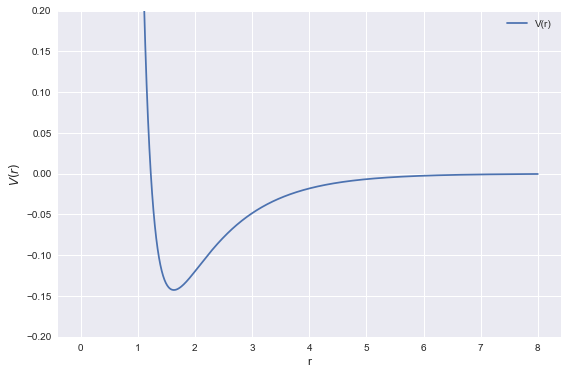

In [20]:
x = np.linspace(0.01, 8, 1000)

fig, ax = plt.subplots(figsize=(9,6))
ax.set_ylim(-0.2, 0.2)
ax.plot(x, V(x, *params), label="V(r)")
ax.legend()
ax.set_ylabel("$V(r)$", fontsize=12)
ax.set_xlabel("r", fontsize=12)
plt.show()
plt.close()

In [21]:
solution = spo.minimize(
    V,
    x0=1,
    args=params,
    method="Newton-CG",
    jac=Jacobian,
    options={
        "xtol": 1.E-6,
        "disp": False
    }
)
print("Full Output (Newton-CG):\n", solution)
print("Solution (r):", solution.x, "\n")

Full Output (Newton-CG):
      fun: array([-0.1426116])
     jac: array([5.81422133e-11])
 message: 'Optimization terminated successfully.'
    nfev: 9
    nhev: 0
     nit: 9
    njev: 17
  status: 0
 success: True
       x: array([1.63051593])
Solution (r): [1.63051593] 



#### Excercise 4

Find the global minimum of the [Rosenbrock function][1]. Use the paramter values shown in the wikipedia page. Solve it twice, once with and once without the Jacobian. Use a starting guess that is $0\leq x\leq20,\ 0\leq y\leq20$.

[1]: https://en.wikipedia.org/wiki/Rosenbrock_function

In [22]:
params = (1, 100)

def rosenbrock(xy: Tuple[float, float], *params) -> float:
    x, y = xy
    a, b = params
    return (a - x)**2 + b * (y - x**2)**2

def Jacobian(xy: Tuple[float, float], *params) -> np.ndarray:
    x, y = xy
    a, b = params
    return np.array([-2*(a - x) - 4*b*x*(y - x**2), 2*b*(y - x**2)])

<font color="blue">Answer:</font> 

In [23]:
x0 = np.array([10, 10])

solution1 = spo.minimize(
    rosenbrock, 
    x0, 
    args=params, 
    method='Nelder-Mead', 
    options={
        'xtol': 1.E-6, 
        'disp': False
    }
)
print("Solved Without Jacobian")
print("Full Output (Nelder-Mead):\n", solution1)
print("Solutions (x, y):", solution1.x, "\n")

solution2 = spo.minimize(
    rosenbrock, 
    x0, 
    args=params, 
    method='BFGS', 
    jac=Jacobian, 
    options={ 
        'disp': False
    }
)
print("Solved With Jacobian")
print("Full Output (BFGS):\n", solution2)
print("Solutions (x, y):", solution2.x, "\n")

print("Expected Solution:")
print("For a=1, b=100, the minimum value of zero is at (1,1)")

Solved Without Jacobian
Full Output (Nelder-Mead):
  final_simplex: (array([[0.99999993, 0.99999992],
       [0.99999975, 0.9999994 ],
       [0.9999996 , 0.99999929]]), array([3.17385981e-13, 9.68695227e-13, 9.89127627e-13]))
           fun: 3.173859810754698e-13
       message: 'Optimization terminated successfully.'
          nfev: 258
           nit: 141
        status: 0
       success: True
             x: array([0.99999993, 0.99999992])
Solutions (x, y): [0.99999993 0.99999992] 

Solved With Jacobian
Full Output (BFGS):
       fun: 3.881227615747895e-14
 hess_inv: array([[0.48805207, 0.97665938],
       [0.97665938, 1.95939504]])
      jac: array([ 3.79550498e-06, -1.72051839e-06])
  message: 'Optimization terminated successfully.'
     nfev: 112
      nit: 87
     njev: 112
   status: 0
  success: True
        x: array([1.00000018, 1.00000035])
Solutions (x, y): [1.00000018 1.00000035] 

Expected Solution:
For a=1, b=100, the minimum value of zero is at (1,1)
